# Gather

In [1]:
import sys
# sys.path.append("../../")

In [2]:
from PIL import Image
import numpy as np
from skimage import filters
import matplotlib.pyplot as plt
from skimage.util import random_noise
from functools import partial
from skimage.measure import compare_ssim, compare_psnr
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from path import Path
from collections import defaultdict

In [3]:
import bm3d

In [4]:
data_pth = Path('/Users/alaa/data/Input_EM_images/')

In [5]:
data_files = []
for dataset in data_pth.dirs():
    for file in dataset.files():
        data_files.append(file)
print(data_files)

[Path('/Users/alaa/data/Input_EM_images/Fig2b/medulla7column_10x10x10nm_1000x1000x1000_orig_adjusted_LUT_bm3d_30.tif'), Path('/Users/alaa/data/Input_EM_images/Fig2b/medulla7column_10x10x10nm_1000x1000x1000_orig_adjusted_LUT_bm3d_55.tif'), Path('/Users/alaa/data/Input_EM_images/Fig2b/medulla7column_10x10x10nm_1000x1000x1000_orig_adjusted_LUT.tif'), Path('/Users/alaa/data/Input_EM_images/Fig2b/medulla7column_10x10x10nm_1000x1000x1000_bilinear_adjusted_LUT_bm3d_77.tif'), Path('/Users/alaa/data/Input_EM_images/Fig2b/medulla7column_10x10x10nm_1000x1000x1000_orig_adjusted_LUT_bm3d_77.tif'), Path('/Users/alaa/data/Input_EM_images/Fig2b/medulla7column_10x10x10nm_1000x1000x1000_bilinear_adjusted_LUT.tif'), Path('/Users/alaa/data/Input_EM_images/Fig2b/medulla7column_10x10x10nm_1000x1000x1000_bilinear_adjusted_LUT_bm3d_55.tif'), Path('/Users/alaa/data/Input_EM_images/Fig2b/medulla7column_10x10x10nm_1000x1000x1000_bilinear_adjusted_LUT_bm3d_30.tif'), Path('/Users/alaa/data/Input_EM_images/Fig1c/10

In [5]:
def normalize_arr(arr):
    return (arr - np.min(arr))/np.ptp(arr)

In [9]:
def do_inferences(data_files, sigma=30):
    bm3d_scores = defaultdict(list)
    for input_pth in data_files:
        input_img = Image.open(input_pth)
        input_arr = np.asarray(input_img, np.uint8)

        norm_arr = normalize_arr(input_arr)
        bm3d_arr = bm3d.bm3d(norm_arr, sigma_psd=sigma/255, 
                             stage_arg=bm3d.BM3DStages.ALL_STAGES)
        bm3d_arr = np.asarray(bm3d_arr*input_arr.max(), np.uint8)
        bm3d_img = Image.fromarray(bm3d_arr)
        bm3d_name = input_pth.stem + f'_bm3d_{sigma}.tif'
        save_pth = str(input_pth.parent/bm3d_name)
        bm3d_img.save(save_pth)

        print(f'Saved BM3D Inference in {save_pth}')
    return 'Return Statement? Hmmm...'

In [10]:
do_inferences(data_files, sigma=55)

Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig2b/medulla7column_10x10x10nm_1000x1000x1000_orig_adjusted_LUT_bm3d_55.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig2b/medulla7column_10x10x10nm_1000x1000x1000_bilinear_adjusted_LUT_bm3d_55.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig1c/10_Tile_r1-c1_orig_bm3d_55.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig1c/10_Tile_r1-c1_truth_bm3d_55.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig1c/10_Tile_r1-c1_bilinear_bm3d_55.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig2d/EM-0015_bilinear_bm3d_55.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig2d/EM-0015_orig_bm3d_55.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig2c/Weinberg 3-3 4x4x4nm-scaled_to_8x8x4nm-20318_bilinear_bm3d_55.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig2c/Weinberg 3-3 4x4x4nm-scaled_to_8x8x4nm-20318_319_orig_bm3d_55.tif
Sav

'Return Statement? Hmmm...'

In [11]:
do_inferences(data_files, sigma=77)

Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig2b/medulla7column_10x10x10nm_1000x1000x1000_orig_adjusted_LUT_bm3d_77.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig2b/medulla7column_10x10x10nm_1000x1000x1000_bilinear_adjusted_LUT_bm3d_77.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig1c/10_Tile_r1-c1_orig_bm3d_77.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig1c/10_Tile_r1-c1_truth_bm3d_77.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig1c/10_Tile_r1-c1_bilinear_bm3d_77.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig2d/EM-0015_bilinear_bm3d_77.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig2d/EM-0015_orig_bm3d_77.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig2c/Weinberg 3-3 4x4x4nm-scaled_to_8x8x4nm-20318_bilinear_bm3d_77.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig2c/Weinberg 3-3 4x4x4nm-scaled_to_8x8x4nm-20318_319_orig_bm3d_77.tif
Sav

'Return Statement? Hmmm...'

In [ ]:
do_inferences(data_files, sigma=30)

Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig2b/medulla7column_10x10x10nm_1000x1000x1000_orig_adjusted_LUT_bm3d_30.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig2b/medulla7column_10x10x10nm_1000x1000x1000_bilinear_adjusted_LUT_bm3d_30.tif
Saved BM3D Inference in /Users/alaa/data/Input_EM_images/Fig1c/10_Tile_r1-c1_orig_bm3d_30.tif


# Visualize

In [6]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
np.set_printoptions(linewidth=110)

In [86]:
def visualize_sample(input_pth, bm3d_pth, target_pth=None, figsize=(20,20)):
    
    
    bilin_im = np.asarray(Image.open(input_pth), np.uint8)[...,0] # load image to tensor
    bm3d_im = np.asarray(Image.open(bm3d_pth), np.uint8)[...,0] # load image to tensor
    
    if target_pth:
        target_im = np.asarray(Image.open(target_pth), np.uint8)[...,0] # load image to tensor


        bilin_psnr = peak_signal_noise_ratio(target_im, bilin_im, data_range=255.)
        bilin_ssim = structural_similarity(target_im, bilin_im, data_range=255.)

        bm3d_psnr = peak_signal_noise_ratio(target_im, bm3d_im, data_range=255.)
        bm3d_ssim = structural_similarity(target_im, bm3d_im, data_range=255.)

        f, axarr = plt.subplots(1,3, figsize=figsize) # create visualizations
        axarr[0].imshow(bilin_im, cmap=plt.cm.gray) # visualize image tensor
        axarr[0].set_title('LR-Bilinear')
        axarr[0].set_xlabel(f"PSNR: {bilin_psnr:.2f}, SSIM: {bilin_ssim:.2f}")
        axarr[1].imshow(target_im, cmap=plt.cm.gray) # visualize original image file
        axarr[1].set_title('Truth')
        axarr[2].imshow(bm3d_im, cmap=plt.cm.gray) # visualize image tensor
        axarr[2].set_title('LR-Bilinear-BM3D')
        axarr[2].set_xlabel(f"PSNR: {bm3d_psnr:.2f}, SSIM: {bm3d_ssim:.2f}")
        plt.show() # show visualization
    else:
        f, axarr = plt.subplots(1,2, figsize=figsize) # create visualizations
        axarr[0].imshow(bilin_im, cmap=plt.cm.gray) # visualize image tensor
        axarr[0].set_title('LR-Bilinear')
        axarr[1].imshow(bm3d_im, cmap=plt.cm.gray) # visualize image tensor
        axarr[1].set_title('LR-BM3D')
        plt.show() # show visualization

In [87]:
bm3d_pth = data_files[21]
bm3d_bilin_pth = data_files[11]
target_pth = data_files[13]
bilin_pth = data_files[17]
bm3d_pth, bilin_pth, target_pth, bm3d_bilin_pth

(Path('/Users/alaa/data/Input_EM_images/Fig2d/EM-0015_orig_bm3d_55.tif'),
 Path('/Users/alaa/data/Input_EM_images/Fig1c/10_Tile_r1-c1_bilinear.tif'),
 Path('/Users/alaa/data/Input_EM_images/Fig1c/10_Tile_r1-c1_truth.tif'),
 Path('/Users/alaa/data/Input_EM_images/Fig1c/10_Tile_r1-c1_bilinear_bm3d_55.tif'))

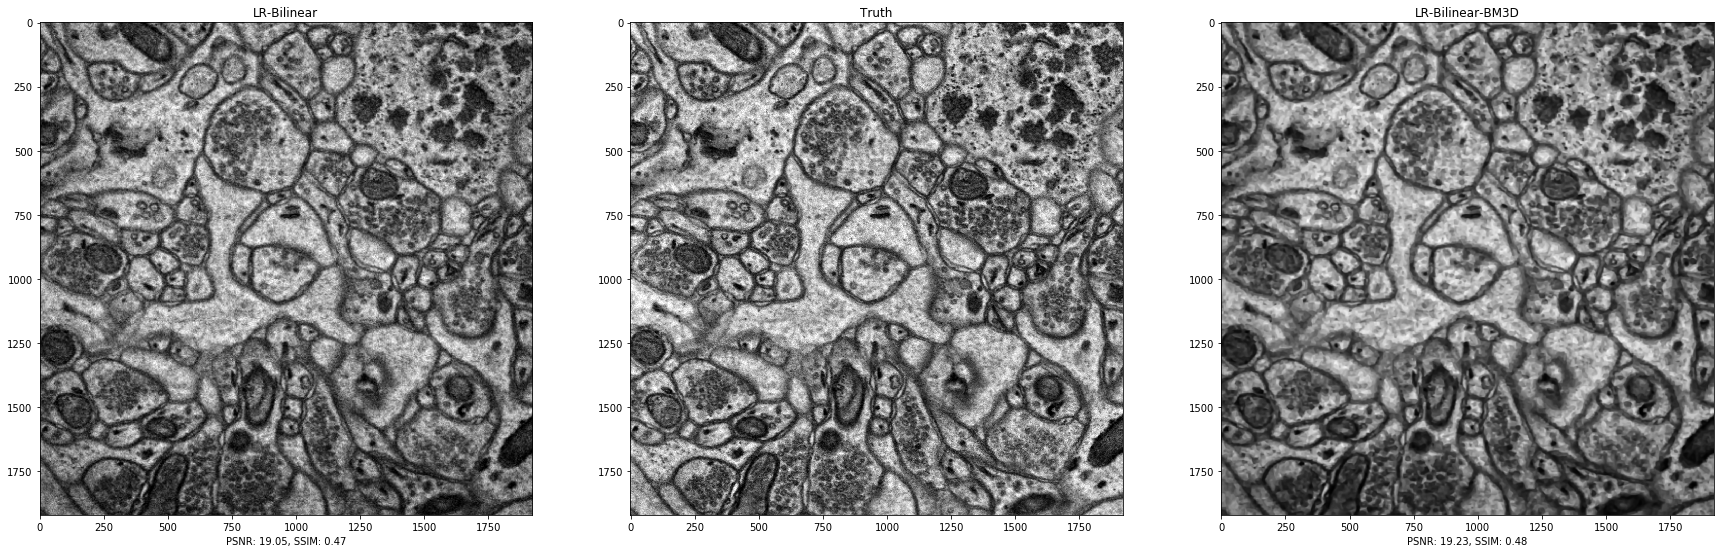

In [90]:
visualize_sample(bilin_pth, bm3d_bilin_pth.parent/bm3d_bilin_pth.stem.replace('55', '55')+'.tif', target_pth, figsize=(30, 20))

# DEV